---
#🍽️ Indian Food Calorie Prediction – Data Science & ML Project
---
<br>

This project aims to build a machine-learning model that predicts the calorie content of Indian dishes based on their nutrient values and ingredients.
<br>

This notebook-

*   Loads two datasets
    *   Dish-level dataset
    *   Ingredient-level dataset

*   Performs Exploratory Data Analysis (EDA) with matplotlib

*   Trains multiple ML models using scikit-learn
    *   Linear Regression
    *   Ridge Regression
    *   Random Forest

*   Evaluates model accuracy and compares performance  

*   Performs nutrient-based clustering using KMeans

*   Builds a simple ingredient-based calorie estimation baseline  

*   Includes a **user-input calorie predictor** that lets the user enter a dish name and main ingredients.
    *   If the dish exists in the dataset, the exact calorie value is shown
    *   If not, calories are estimated from ingredient-level data

<br>

**Tools used**

NumPy, Pandas, Matplotlib, Scikit-Learn

<br>

**Scope of the Project**

This project predicts calories per 100g of food.
It does not estimate calories based on portion size or cooking method.

<br>

**Limitations**
*   Ingredient quantities are not available

*   Multi-item dishes (thalis, combos) may have inconsistent values

*   Ingredient-based estimation is approximate

*   Dataset size is limited
<br>

---
<br>

In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

import joblib

plt.rcParams.update({'figure.max_open_warning': 0})


In [ ]:
# 📥 Load Datasets

import pandas as pd
from IPython.display import display, HTML

# Define file paths
dish_path = "https://raw.githubusercontent.com/nandgate1302/Data_Science_ML_Project/main/Dish_level_dataset.xlsx"
ing_path = "https://raw.githubusercontent.com/nandgate1302/Data_Science_ML_Project/main/Ingredient_level_dataset.csv"

# Load datasets
df_dish = pd.read_excel(dish_path)
df_ing = pd.read_csv(ing_path)

# Column list display
print("\n📌 Dish Dataset Columns:\n")
for col in df_dish.columns:
    print(" -", col)

print("\n📌 Ingredient Dataset Columns:\n")
for col in df_ing.columns:
    print(" -", col)

# Table previews
display(HTML("<br><h3>Dish-level Dataset (First 10 Rows)</h3>"))
display(df_dish.head(10))

display(HTML("<br><h3>Ingredient-level Dataset (First 10 Rows)</h3>"))
display(df_ing.head(10))



📌 Dish Dataset Columns:

 - Dish Name
 - Calories (kcal)
 - Carbohydrates (g)
 - Protein (g)
 - Fats (g)
 - Free Sugar (g)
 - Fibre (g)
 - Sodium (mg)
 - Calcium (mg)
 - Iron (mg)
 - Vitamin C (mg)
 - Main Ingredients

📌 Ingredient Dataset Columns:

 - Ingredient
 - Category
 - Calories (kcal/100g)
 - Protein (g)
 - Fat (g)
 - Carbohydrates (g)
 - Fibre (g)
 - Sugar (g)
 - Sodium (mg)
 - Calcium (mg)
 - Iron (mg)


,Dish Name,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Main Ingredients
0,Hot Tea,16.14,2.58,0.39,0.53,2.58,0.00,3.12,14.20,0.02,0.50,"Milk, Tea leaves, Sugar"
1,Instant Coffee,23.16,3.65,0.64,0.75,3.62,0.00,4.92,20.87,0.06,1.51,"Coffee powder, Milk, Sugar"
2,Iced Tea,10.34,2.70,0.03,0.01,2.70,0.00,0.23,1.18,0.02,5.95,"Tea leaves, Sugar, Lemon, Water"
3,Raw Mango Drink,35.92,9.05,0.16,0.03,7.49,0.61,79.82,7.08,0.14,45.30,"Raw mango, Sugar, Cumin, Salt, Water"
4,Fruit Punch (With Fresh Juices),36.12,9.38,0.14,0.03,9.25,0.06,2.63,5.07,0.10,41.44,"Fruit, Water"
5,Lemonade,20.80,5.48,0.03,0.01,5.47,0.02,28.52,1.84,0.05,5.27,"Lemon,water"
6,Banana Milkshake,65.31,9.15,1.84,2.37,7.96,0.26,13.61,62.64,0.13,6.84,"Banana, Milk"
7,Mango Milkshake,56.90,7.23,1.73,2.35,7.15,0.26,13.27,62.33,0.15,20.10,"Mango, Milk"
8,Pineapple Milkshake,55.72,7.62,1.66,2.23,7.60,0.00,14.05,59.92,0.11,10.22,"Pineapple, Milk"
9,Orange Milkshake,57.42,7.11,1.86,2.52,7.08,0.00,14.63,67.42,0.11,10.82,"Orange, Milk"


,Ingredient,Category,Calories (kcal/100g),Protein (g),Fat (g),Carbohydrates (g),Fibre (g),Sugar (g),Sodium (mg),Calcium (mg),Iron (mg)
0,Milk (Cow),Dairy,67,3.2,4.0,5.0,0.0,5.0,44,120,0.1
1,Paneer,Dairy,265,18.0,21.0,1.2,0.0,2.0,24,208,0.2
2,Ghee,Dairy,900,0.0,100.0,0.0,0.0,0.0,2,5,0.0
3,Butter,Dairy,717,0.9,81.0,0.1,0.0,0.1,11,24,0.0
4,Curd,Dairy,98,11.0,4.3,3.0,0.0,4.7,36,83,0.2
5,Cheese,Dairy,402,25.0,33.0,1.3,0.0,0.3,621,721,0.7
6,Cream,Dairy,345,2.0,37.0,3.0,0.0,3.0,38,66,0.1
7,Skimmed Milk,Dairy,35,3.4,0.1,5.0,0.0,5.0,42,122,0.1
8,Moong Dal,Pulse,347,24.0,1.0,60.0,16.0,2.0,15,132,4.4
9,Masoor Dal,Pulse,340,25.0,1.5,60.0,11.0,2.0,9,64,7.5


In [ ]:
# Cleaning & Preprocessing

# Strip whitespace from column names
df_dish.columns = [c.strip() for c in df_dish.columns]
df_ing.columns = [c.strip() for c in df_ing.columns]

# Select useful numeric nutrient features
candidate_features = [
    "Carbohydrates (g)",
    "Protein (g)",
    "Fats (g)",
    "Free Sugar (g)",
    "Fibre (g)",
    "Sodium (mg)",
    "Calcium (mg)",
    "Iron (mg)",
    "Vitamin C (mg)"
]

# Detect folate column (name may vary)
for col in df_dish.columns:
    if "Folate" in col:
        candidate_features.append(col)

# Keep only features that actually exist in the dataset
features = [c for c in candidate_features if c in df_dish.columns]

# Create a working copy
model_df = df_dish.copy()

# Convert numeric columns and fill missing values
for col in features + ["Calories (kcal)"]:
    model_df[col] = pd.to_numeric(model_df[col], errors="coerce")
    model_df[col] = model_df[col].fillna(model_df[col].mean())

# Remove rows without dish names
model_df = model_df.dropna(subset=["Dish Name"]).reset_index(drop=True)


In [ ]:
# Prepare Data for ML

model_df = df_dish.copy()

for col in features + ["Calories (kcal)"]:
    model_df[col] = pd.to_numeric(model_df[col], errors="coerce")
    model_df[col] = model_df[col].fillna(model_df[col].mean())

model_df = model_df.dropna(subset=["Dish Name"]).reset_index(drop=True)


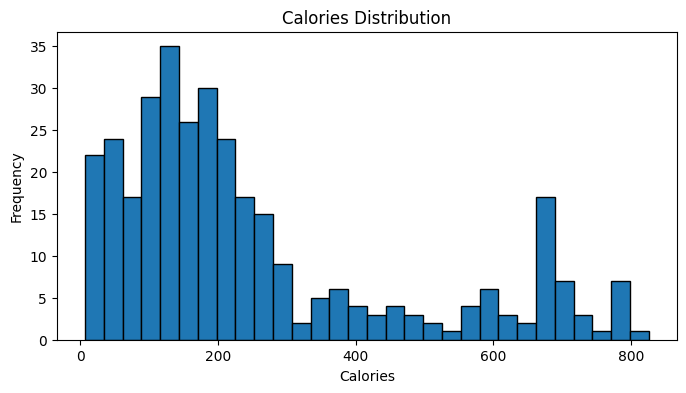

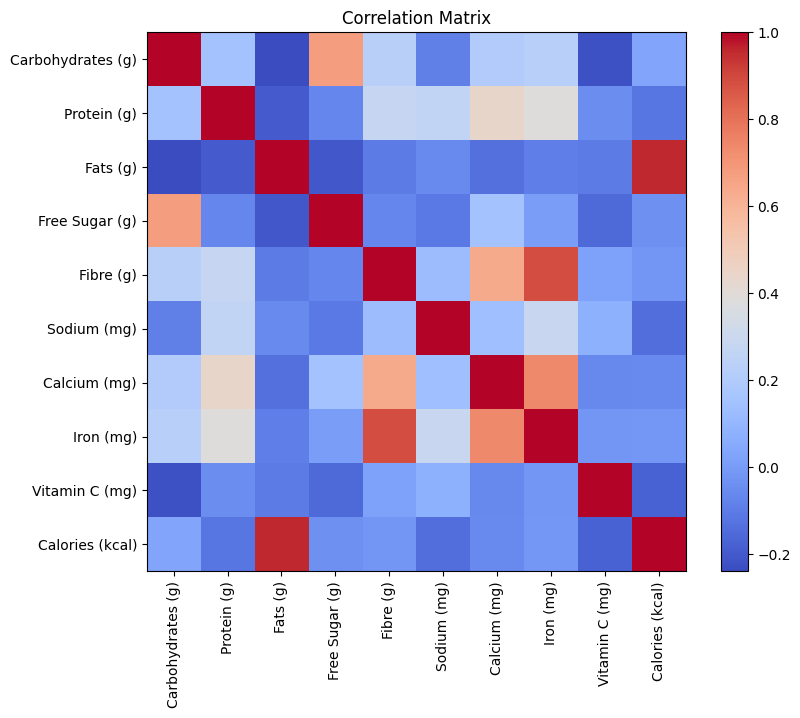

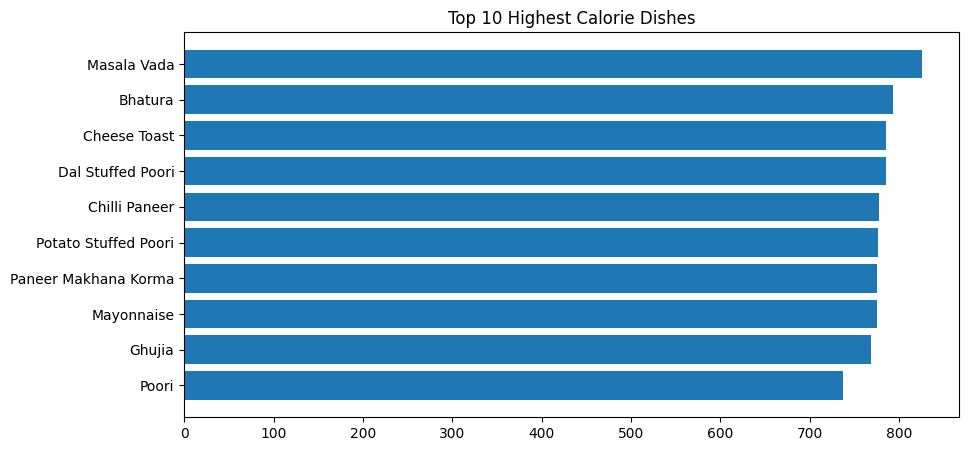

In [ ]:
# EDA (Matplotlib Visuals)

# Calories Distribution
plt.figure(figsize=(8,4))
plt.hist(model_df["Calories (kcal)"], bins=30, edgecolor='black')
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()
print("\n")

# Correlation Matrix
corr = model_df[features + ["Calories (kcal)"]].corr()
plt.figure(figsize=(9,7))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.show()
print("\n")

# Top 10 Highest Calorie Dishes
top10 = model_df.sort_values("Calories (kcal)", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top10["Dish Name"][::-1], top10["Calories (kcal)"][::-1])
plt.title("Top 10 Highest Calorie Dishes")
plt.show()


In [ ]:
# Train-Test Split + Scaling

X = model_df[features].values
y = model_df["Calories (kcal)"].values

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, model_df.index.values, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train models

lr = LinearRegression()
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

# Predictions
pred_lr = lr.predict(X_test_scaled)
pred_ridge = ridge.predict(X_test_scaled)
pred_rf = rf.predict(X_test)

# Function to calculate model metrics
def get_metrics(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Compare models
df_metrics = pd.DataFrame([
    {"Model": "Linear Regression", **get_metrics(y_test, pred_lr)},
    {"Model": "Ridge Regression", **get_metrics(y_test, pred_ridge)},
    {"Model": "Random Forest", **get_metrics(y_test, pred_rf)},
])

# Display and save
from IPython.display import display
display(df_metrics.round(4))

# Sort and save
df_metrics.sort_values("MAE", inplace=True)
df_metrics.to_csv("model_performance_summary.csv", index=False)
print("Saved model_performance_summary.csv")



,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.9950,4.2017,17.4324
1,Ridge Regression,0.9950,4.7005,17.4641
2,Random Forest,0.9927,12.8801,21.0222


Saved model_performance_summary.csv


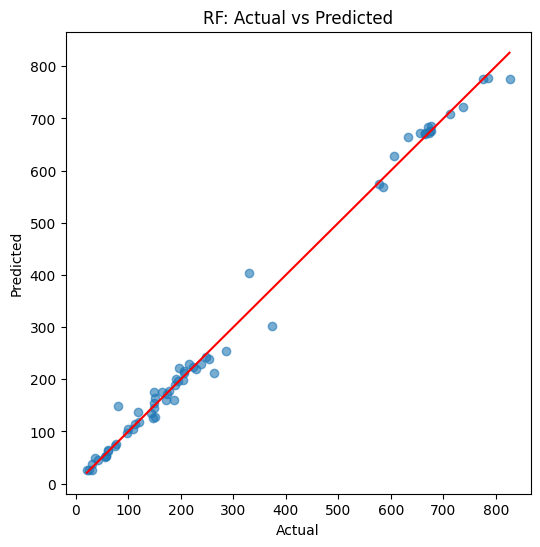

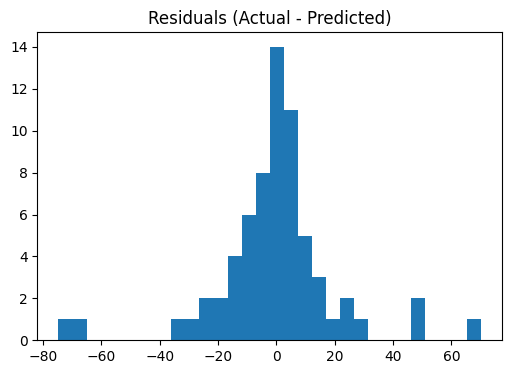

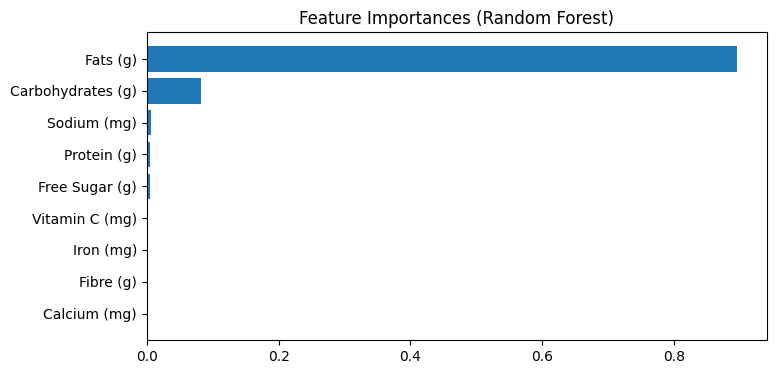

In [ ]:
# Random Forest Visualizations

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RF: Actual vs Predicted")
plt.show()
print("\n")

# Residuals Histogram
residuals = y_test - pred_rf
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residuals (Actual - Predicted)")
plt.show()
print("\n")

# Feature Importances
feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,4))
plt.barh(feat_imp.index, feat_imp.values)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [ ]:
# Top 20 Worst RF Errors

df_compare = model_df.loc[idx_test, ["Dish Name"] + features].copy().reset_index(drop=True)
df_compare["Actual Calories"] = y_test
df_compare["Pred_RF"] = pred_rf
df_compare["Error_RF"] = abs(df_compare["Actual Calories"] - df_compare["Pred_RF"])

df_compare.sort_values("Error_RF", ascending=False).head(20)


,Dish Name,Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Actual Calories,Pred_RF,Error_RF
27,Mayonnaise Without Eggs,3.98,2.13,33.84,3.68,0.04,193.58,75.54,0.27,12.050000,329.05,403.75560,74.70560
52,Tamarind Rice,65.08,7.45,8.53,11.65,5.12,162.41,50.94,2.89,0.840000,373.04,302.79395,70.24605
3,Clear Tomato Soup,3.45,4.79,12.22,1.44,1.96,5135.74,29.05,1.14,53.160000,80.07,148.82375,68.75375
14,Chocolate Sauce,43.21,1.91,10.39,42.06,0.00,2.80,18.80,1.13,0.000000,263.20,212.82930,50.37070
36,Masala Vada,4.06,1.69,89.15,0.24,1.07,74.53,7.45,0.52,2.050000,826.02,776.45955,49.56045
62,Potato Bonda,4.53,1.09,67.80,0.27,0.83,132.53,6.79,0.37,8.960000,632.84,664.46155,31.62155
50,Paneer Kaathi Roll,20.10,6.92,19.55,3.29,2.40,221.03,101.66,1.42,18.670000,285.94,254.45720,31.48280
6,Chicken Lasagne,13.90,10.45,10.36,2.74,0.11,238.55,119.98,0.64,4.230000,187.49,160.75015,26.73985
8,Pineapple Jam,38.27,0.32,0.15,37.44,2.20,2.45,10.47,0.24,12.424656,149.18,175.61625,26.43625
55,Curd Rice (Dahi Bhaat/Thayir Saadam),32.93,5.75,4.32,3.91,2.13,213.29,101.52,0.59,5.100000,195.74,221.04750,25.30750


In [ ]:
# KMeans Clustering

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
model_df["Cluster"] = kmeans.fit_predict(scaler.fit_transform(X))

cluster_summary = model_df.groupby("Cluster")["Calories (kcal)"].agg(["count","mean"])
cluster_summary

,count,mean
Cluster,,
0,225,138.064800
1,7,294.094286
2,37,297.864324
3,60,645.756333


In [ ]:
# Ingredient-Based Naive Estimate

ing_lookup = {row["Ingredient"].lower(): row["Calories (kcal/100g)"] for _, row in df_ing.iterrows()}

def estimate(ing_str):
    if not isinstance(ing_str, str): return np.nan
    parts = [p.strip().lower() for p in ing_str.split(",")]
    vals=[]
    for p in parts:
        for k,v in ing_lookup.items():
            if p in k or k in p:
                vals.append(v)
                break
    return np.mean(vals) if vals else np.nan

model_df["Ingredient_Estimate"] = model_df["Main Ingredients"].apply(estimate)

valid = model_df.dropna(subset=["Ingredient_Estimate"])
mae_naive = mean_absolute_error(valid["Calories (kcal)"], valid["Ingredient_Estimate"])
mae_rf = mean_absolute_error(y_test, pred_rf)

mae_naive, mae_rf


(157.25385964912283, 12.88007499999996)

In [ ]:
# Save Random Forest Model
joblib.dump({"rf":rf,"scaler":scaler,"features":features}, "calorie_model_bundle.joblib")
"Model saved successfully!"


'Model saved successfully!'

In [ ]:
# Protein-rich dishes

protein_rich = model_df[
    (model_df["Protein (g)"] > 10) &
    (model_df["Calories (kcal)"] < 250) &
    (model_df["Main Ingredients"].str.lower() != "unknown")
]

protein_rich_sorted = protein_rich.sort_values(by="Protein (g)", ascending=False)

# Display top 20
protein_rich_sorted[["Dish Name", "Protein (g)", "Calories (kcal)", "Main Ingredients"]].head(20)

,Dish Name,Protein (g),Calories (kcal),Main Ingredients
248,Roast Chicken,20.49,199.90,"Chicken, Onion"
126,Tandoori Chicken,16.26,145.20,"Chicken, Onion"
132,Fish Tikka,16.00,117.33,"Fish, Spices"
48,Chicken Sweet Corn Soup,14.48,28.32,"Corn, Water"
283,Egg In A Pepper,12.64,128.78,"Egg, Onion"
26,Paneer Pea Sandwich (Toasted),12.40,249.56,"Bread, Paneer, Tomato"
27,Chicken Sandwich (Toasted),12.08,167.37,"Bread, Chicken, Onion"
37,Poached Egg,11.98,123.87,Egg
39,Baked Egg,11.88,218.85,Egg
125,Chicken Curry,11.79,129.22,"Chicken, Onion, Tomato, Spices, Oil"


In [ ]:
# -----------------------------
# User Input Calorie Predictor
# -----------------------------

def estimate_from_ingredients(ingredients):
    # Estimate calorie content based on ingredient calorie dataset

    ing_list = [i.strip().lower() for i in ingredients.split(",") if i.strip()]
    vals = []

    for ing in ing_list:
        matched = None
        for k, v in ing_lookup.items():
            if ing in k or k in ing:  # fuzzy match
                matched = v
                break
        if matched is not None:
            vals.append(matched)

    if len(vals) == 0:
        return None  # no match
    return np.mean(vals)


def predict_calories_from_user():

    # 1. TAKE USER INPUT
    # -----------------------------
    dish_name = input("Enter dish name: ").strip().lower()
    ingredients = input("Enter main ingredients (comma-separated): ").strip().lower()

    print("\n------------------------------------")
    print("🔍 Checking if dish exists in dataset")
    print("------------------------------------\n")


    # 2. CHECK IF DISH EXISTS IN DATASET
    # -----------------------------
    match = model_df[model_df["Dish Name"].str.lower() == dish_name]

    if len(match) > 0:
        print("🍽️ Dish found in dish-level dataset!\n")
        row = match.iloc[0]
        print(f"Dish Name      : {row['Dish Name']}")
        print(f"Calories (kcal): {row['Calories (kcal)']}")
        print(f"Protein (g)    : {row['Protein (g)']}")
        print(f"Fats (g)       : {row['Fats (g)']}")
        print(f"Carbs (g)      : {row['Carbohydrates (g)']}")
        print("\n(Main ingredients were not used because the dish exists in the dataset.)")
        return


    # 3. IF NOT FOUND → ESTIMATE FROM INGREDIENTS
    # -----------------------------
    print("❗ Dish NOT found. Using ingredient-based estimation...\n")

    est_cal = estimate_from_ingredients(ingredients)

    if est_cal is None:
        print("⚠️ Could not match any ingredient to the ingredient dataset.")
        return

    print(f"Estimated Calories (based on ingredients): {est_cal:.2f} kcal per 100g\n")


# Run the interactive system:
predict_calories_from_user()
